In [1]:
import sys, os
sys.path.append("..")

# import pfb
import helper as h
# from constants import SINC
import numpy as np
import matplotlib.pyplot as plt

In [2]:
2048*4//3 , 2048*4//5, 2048*4//6, 2048*4//7

(2730, 1638, 1365, 1170)

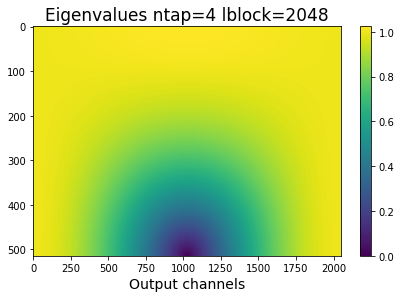

1054720

In [3]:

# ntap,lblock = 2,4096
# ntap,lblock = 3,2730
ntap,lblock = 4,2048
# ntap,lblock = 5,1638
# ntap,lblock = 6,1365
# ntap,lblock = 7,1170
# ntap,lblock = 8,1024
sinc = np.sinc(np.linspace(-ntap/2,ntap/2,ntap*lblock))
mat_eig = h.r_window_to_matrix_eig(sinc * np.hanning(len(sinc)) ,
                                  ntap = ntap, lblock = lblock)
m = abs(np.array(mat_eig))
m[0,0] = 0.0
plt.title("Eigenvalues ntap={} lblock={}".format(ntap,lblock),fontsize=17)
plt.imshow(m.T,aspect="auto")
plt.colorbar()
plt.tight_layout()
plt.xlabel("Output channels",fontsize=14)

plt.savefig("eigenvalues_compare_ntap/eigenvalues_ntap_{}_lblock_{}".format(ntap,lblock))
plt.show()

m.shape[0]*m.shape[1]

In [10]:
from constants import SINC,LBLOCK,NTAP

In [13]:
sh = np.sinc(np.linspace(-NTAP//2,NTAP//2,NTAP**2*LBLOCK))*np.hanning(NTAP**2*LBLOCK)
l = NTAP*LBLOCK
seg1 = sh[:l]
seg2 = sh[l:2*l]
seg3 = sh[2*l:3*l]
seg4 = sh[3*l:]

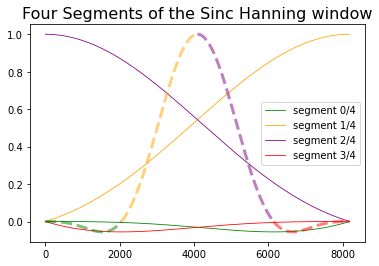

In [51]:
# plt.figure(figsize=(8,5))
for i,(seg,col) in enumerate(zip([seg1,seg2,seg3,seg4],["green","orange","purple","red"])):
    plt.plot(seg,color=col,linewidth=0.8,label="segment {}/4".format(i))

sinc_hanning = SINC*np.hanning(len(SINC))
# idxs = np.arange(0,len(SINC),1)
# plt.plot(sinc_hanning,color="lightblue",label="sinc hanning")
plt.plot(np.arange(0,LBLOCK), sinc_hanning[np.arange(0,LBLOCK)],"--",color="green",alpha=.5,linewidth=3)#,label="sinc hanning")
plt.plot(np.arange(LBLOCK,2*LBLOCK),sinc_hanning[np.arange(LBLOCK,2*LBLOCK)],"--",color="orange",alpha=.5,linewidth=3)
plt.plot(np.arange(LBLOCK*2,3*LBLOCK),sinc_hanning[np.arange(2*LBLOCK,3*LBLOCK)],"--",color="purple",alpha=.5,linewidth=3)
plt.plot(np.arange(3*LBLOCK,4*LBLOCK),sinc_hanning[np.arange(3*LBLOCK,4*LBLOCK)],"--",color="red",alpha=.5,linewidth=3)
plt.title("Four Segments of the Sinc Hanning window",fontsize=16)
plt.legend()
# plt.savefig("four_segments_of_sinc_hanning.png")
plt.show()
